In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

# Load the CSV file
data = pd.read_csv(r"C:\Users\chintu\Desktop\WalmartSalesAnalysis-master\WalmartSalesData.csv", encoding='utf-8')

# Show the first 10 rows to get an idea of the data 
print(data.head(10))



    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Spo

Information about the data set

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


checking for null values 

In [5]:
null_values = data.isnull().sum()
print(null_values)


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


Checking for duplicates

In [6]:
duplicates = data.duplicated()
print(duplicates.sum())


0


In [8]:
#data types of each column
print(data.dtypes)


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


Generic Questions:
1.How many unique cities does the data have?

In [9]:
unique_cities = data['City'].nunique()
print(f"Number of unique cities: {unique_cities}")


Number of unique cities: 3


2. In which city is each branch?

In [10]:
branch_city = data.groupby('Branch')['City'].unique()
print(branch_city)

Branch
A       [Yangon]
B     [Mandalay]
C    [Naypyitaw]
Name: City, dtype: object


Product

How many unique product lines does the data have?

In [11]:
unique_product_lines = data['Product line'].nunique()
print(f"Number of unique product lines: {unique_product_lines}")


Number of unique product lines: 6


What is the most common payment method?

In [12]:
most_common_payment = data['Payment'].mode()[0]
print(f"The most common payment method: {most_common_payment}")


The most common payment method: Ewallet


What is the most selling product line?

In [13]:
most_selling_product_line = data.groupby('Product line')['Quantity'].sum().idxmax()
print(f"The most selling product line: {most_selling_product_line}")


The most selling product line: Electronic accessories


What is the total revenue by month?

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
total_revenue_by_month = data.groupby('Month')['Total'].sum()
print(total_revenue_by_month)


Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


What month had the largest COGS?


In [15]:
data['Month'] = data['Date'].dt.month
largest_cogs_month = data.groupby('Month')['cogs'].sum().idxmax()
print(f"Month with the largest COGS: {largest_cogs_month}")


Month with the largest COGS: 1


What product line had the largest revenue?


In [16]:
largest_revenue_product_line = data.groupby('Product line')['Total'].sum().idxmax()
print(f"Product line with the largest revenue: {largest_revenue_product_line}")


Product line with the largest revenue: Food and beverages


What is the city with the largest revenue?

In [18]:
city_largest_revenue = data.groupby('City')['Total'].sum().idxmax()
print(f"City with the largest revenue: {city_largest_revenue}")


City with the largest revenue: Naypyitaw


What product line had the largest VAT?

In [19]:
data['VAT'] = data['Tax 5%']  # Assuming Tax 5% column represents VAT
largest_vat_product_line = data.groupby('Product line')['VAT'].sum().idxmax()
print(f"Product line with the largest VAT: {largest_vat_product_line}")


Product line with the largest VAT: Food and beverages


Fetch each product line and add a column to those product lines showing "Good", "Bad". Good if it's greater than average sales

In [20]:
average_sales = data['Total'].mean()
data['Sales Performance'] = data.apply(lambda row: 'Good' if row['Total'] > average_sales else 'Bad', axis=1)
print(data[['Product line', 'Sales Performance']].drop_duplicates())


              Product line Sales Performance
0        Health and beauty              Good
1   Electronic accessories               Bad
2       Home and lifestyle              Good
4        Sports and travel              Good
5   Electronic accessories              Good
8        Health and beauty               Bad
9       Food and beverages               Bad
10     Fashion accessories               Bad
13      Food and beverages              Good
19      Home and lifestyle               Bad
24       Sports and travel               Bad
30     Fashion accessories              Good


Which branch sold more products than average product sold?


In [21]:
average_quantity_sold = data['Quantity'].mean()
branch_sales = data.groupby('Branch')['Quantity'].sum()
branches_above_average = branch_sales[branch_sales > average_quantity_sold]
print(branches_above_average)


Branch
A    1859
B    1820
C    1831
Name: Quantity, dtype: int64


What is the most common product line by gender?


In [22]:
most_common_product_line_by_gender = data.groupby(['Gender', 'Product line']).size().idxmax()
print(f"Most common product line by gender: {most_common_product_line_by_gender}")


Most common product line by gender: ('Female', 'Fashion accessories')


What is the average rating of each product line?

In [25]:
average_rating_per_product_line = data.groupby('Product line')['Rating'].mean()
print(average_rating_per_product_line)


Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


SALES

Number of sales made in each time of the day per weekday


In [26]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
data['Weekday'] = data['Date'].dt.weekday
sales_by_time_weekday = data.groupby(['Weekday', 'Time']).size().unstack(fill_value=0)
print(sales_by_time_weekday)


Time     10  11  12  13  14  15  16  17  18  19  20
Weekday                                            
0        12   9  14  10   6  18  16  11  11   8  10
1        16  20  11  13  15  14   9   9  12  28  11
2        10  12  14  20  10  17  10  10  17  14   9
3        18  15  11  12  14  12  12  15   9  10  10
4        18  11  10  16  14  18  10   6  11  13  12
5        16  12  18  14  11  12  14  12  18  23  14
6        11  11  11  18  13  11   6  11  15  17   9


Which of the customer types brings the most revenue?

In [28]:
customer_type_revenue = data.groupby('Customer type')['Total'].sum()
most_revenue_customer_type = customer_type_revenue.idxmax()
print(f"Customer type bringing the most revenue: {most_revenue_customer_type}")


Customer type bringing the most revenue: Member


Which city has the largest tax percent/ VAT?

In [29]:
city_largest_vat = data.groupby('City')['VAT'].sum().idxmax()
print(f"City with the largest VAT: {city_largest_vat}")


City with the largest VAT: Naypyitaw


Which customer type pays the most in VAT?

In [30]:
customer_type_vat = data.groupby('Customer type')['VAT'].sum()
most_vat_customer_type = customer_type_vat.idxmax()
print(f"Customer type paying the most VAT: {most_vat_customer_type}")


Customer type paying the most VAT: Member


CUSTOMER

How many unique customer types does the data have?


In [31]:
unique_customer_types = data['Customer type'].nunique()
print(f"Number of unique customer types: {unique_customer_types}")


Number of unique customer types: 2


How many unique payment methods does the data have?

In [33]:
unique_payment_methods = data['Payment'].nunique()
print(f"Number of unique payment methods: {unique_payment_methods}")


Number of unique payment methods: 3


What is the most common customer type?


In [34]:
most_common_customer_type = data['Customer type'].mode()[0]
print(f"The most common customer type: {most_common_customer_type}")


The most common customer type: Member


Which customer type buys the most?

In [35]:
customer_type_most_sales = data.groupby('Customer type')['Quantity'].sum().idxmax()
print(f"Customer type that buys the most: {customer_type_most_sales}")


Customer type that buys the most: Member


What is the gender of most of the customers?

In [36]:
most_common_gender = data['Gender'].mode()[0]
print(f"The most common gender of customers: {most_common_gender}")


The most common gender of customers: Female


What is the gender distribution per branch?

In [37]:
gender_distribution_per_branch = data.groupby(['Branch', 'Gender']).size().unstack(fill_value=0)
print(gender_distribution_per_branch)


Gender  Female  Male
Branch              
A          161   179
B          162   170
C          178   150


Which time of the day do customers give most ratings?

In [42]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour
ratings_by_time = data.groupby('Time')['Rating'].mean()
most_rated_time = ratings_by_time.idxmax()
print(f"Time of the day with the most ratings: {most_rated_time}:00")


Time of the day with the most ratings: 0:00


Which time of the day do customers give most ratings per branch?

In [44]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')  
data['Hour'] = data['Time'].dt.hour  
ratings_by_time_branch = data.groupby(['Branch', 'Hour'])['Rating'].mean()
most_rated_time_per_branch = ratings_by_time_branch.idxmax()
print(f"Time of the day with the most ratings per branch: {most_rated_time_per_branch[1]}:00 at Branch {most_rated_time_per_branch[0]}")


Time of the day with the most ratings per branch: 0:00 at Branch C


Which day of the week has the best avg ratings?

In [45]:
ratings_by_weekday = data.groupby('Weekday')['Rating'].mean()
best_rated_weekday = ratings_by_weekday.idxmax()
print(f"Day of the week with the best average ratings: {best_rated_weekday}")


Day of the week with the best average ratings: 0


Which day of the week has the best average ratings per branch?

In [46]:
ratings_by_weekday_branch = data.groupby(['Branch', 'Weekday'])['Rating'].mean()
best_rated_day_per_branch = ratings_by_weekday_branch.idxmax()
print(f"Day of the week with the best average ratings per branch: {best_rated_day_per_branch}")


Day of the week with the best average ratings per branch: ('B', 0)


DATA VIZUALIZATION

1. Sales Distribution by Product Line

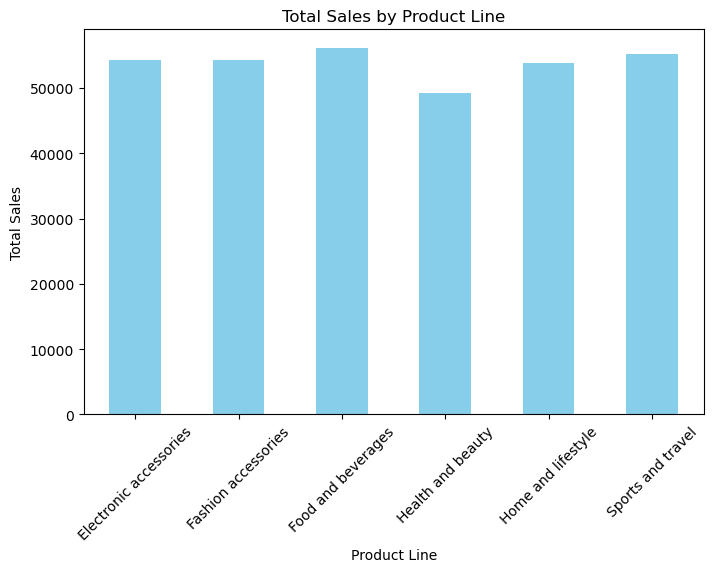

In [48]:
import matplotlib.pyplot as plt
sales_by_product_line = data.groupby('Product line')['Total'].sum()
sales_by_product_line.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


2. Revenue Over Time

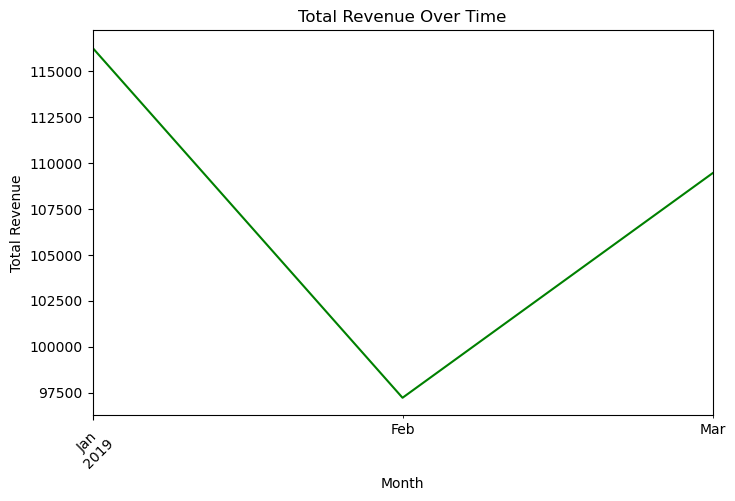

In [51]:
# Convert 'Date' to datetime and extract the month and year
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')
# Calculate total revenue by month
revenue_by_month = data.groupby('Month')['Total'].sum()
# Plot
revenue_by_month.plot(kind='line', figsize=(8, 5), color='green')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


3. Revenue by City

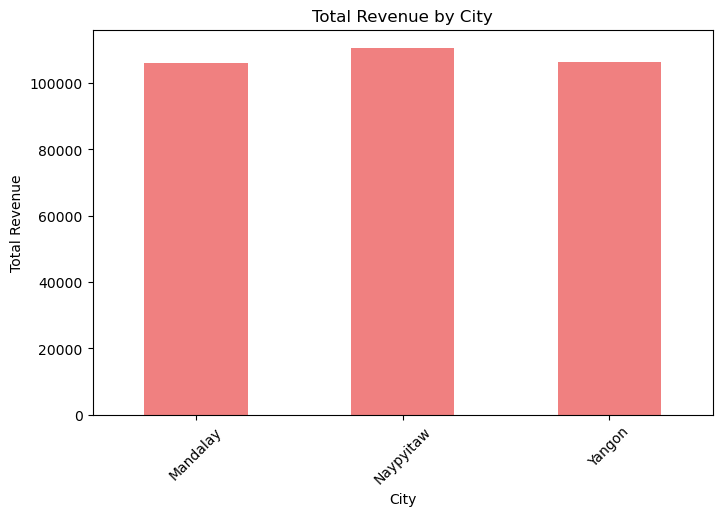

In [53]:
# Calculate total revenue by city
revenue_by_city = data.groupby('City')['Total'].sum()
# Plot
revenue_by_city.plot(kind='bar', color='lightcoral', figsize=(8, 5))
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


4. Rating Distribution

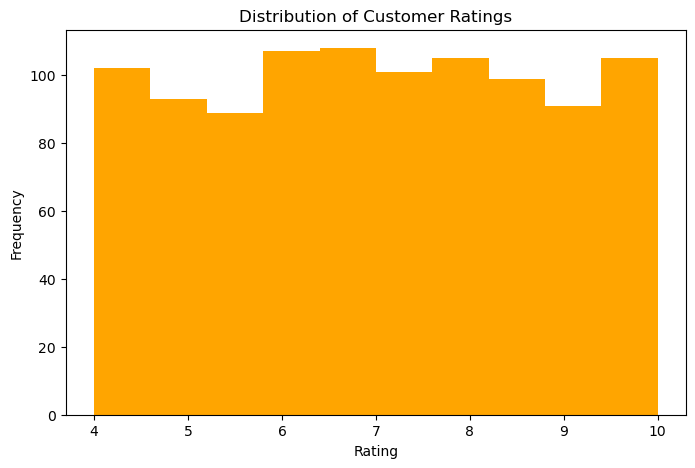

In [55]:
data['Rating'].plot(kind='hist', bins=10, color='orange', figsize=(8, 5))
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


5. Average Rating by Product Line

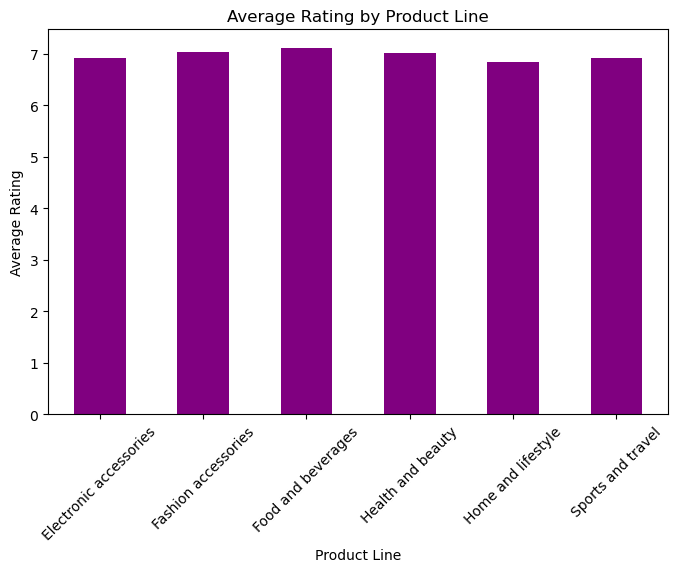

In [57]:
# Calculate average rating by product line
avg_rating_by_product_line = data.groupby('Product line')['Rating'].mean()
# Plot
avg_rating_by_product_line.plot(kind='bar', color='purple', figsize=(8, 5))
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


Total COGS (Cost of Goods Sold) by Branch

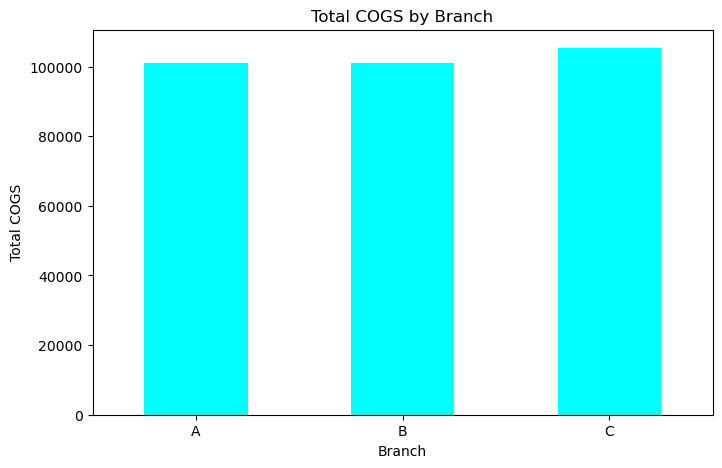

In [59]:
# Calculate total COGS by branch
cogs_by_branch = data.groupby('Branch')['cogs'].sum()
# Plot
cogs_by_branch.plot(kind='bar', color='cyan', figsize=(8,5))
plt.title('Total COGS by Branch')
plt.xlabel('Branch')
plt.ylabel('Total COGS')
plt.xticks(rotation=0)
plt.show()


7. Sales by Hour (Time of Day)

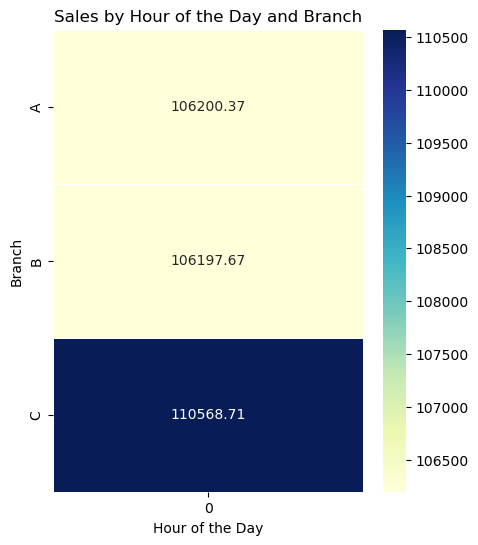

In [62]:
import seaborn as sns

sales_by_hour = data.groupby(['Branch', 'Hour'])['Total'].sum().unstack()

plt.figure(figsize=(5, 6))
sns.heatmap(sales_by_hour, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Sales by Hour of the Day and Branch')
plt.xlabel('Hour of the Day')
plt.ylabel('Branch')
plt.show()


8. Gender Distribution per Branch

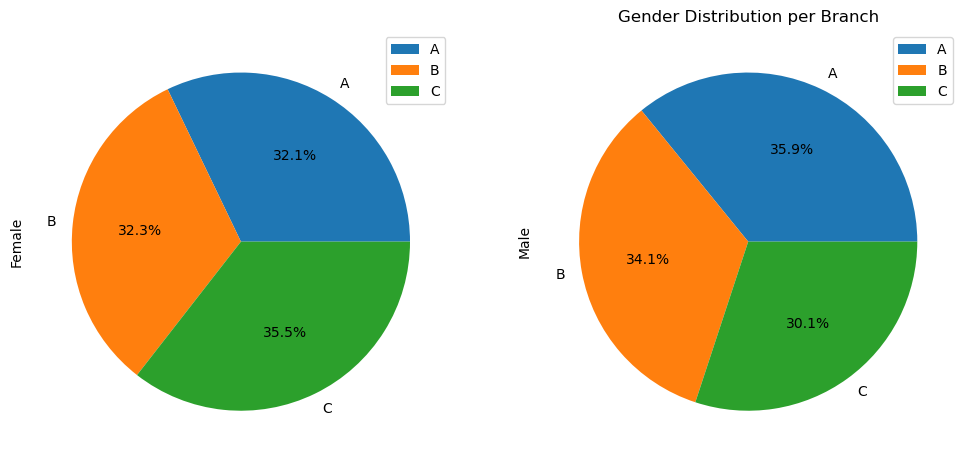

In [63]:
gender_distribution = data.groupby('Branch')['Gender'].value_counts().unstack()
gender_distribution.plot(kind='pie', subplots=True, figsize=(12, 8), autopct='%1.1f%%')
plt.title('Gender Distribution per Branch')
plt.show()


9. Product Line Sales by Payment Method

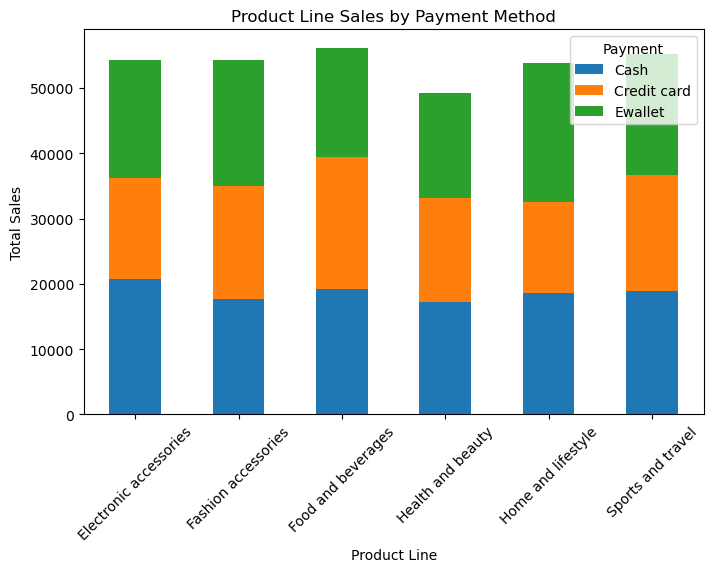

In [66]:
sales_by_product_line_payment = data.groupby(['Product line', 'Payment'])['Total'].sum().unstack()
sales_by_product_line_payment.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Product Line Sales by Payment Method')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


10. Customer Type and Revenue

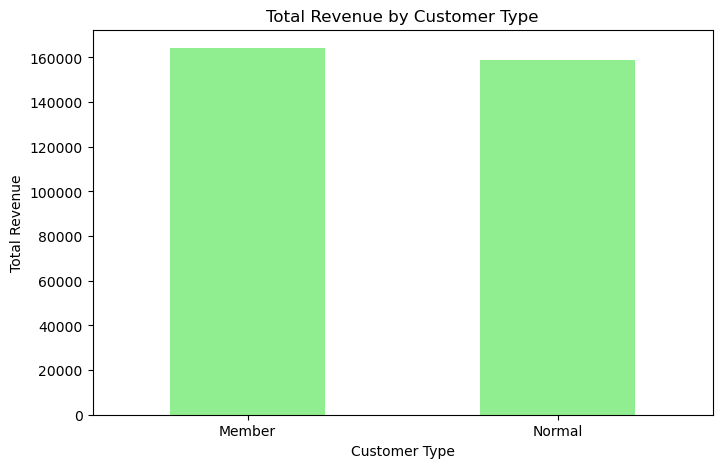

In [69]:
revenue_by_customer_type = data.groupby('Customer type')['Total'].sum()
# Plot
revenue_by_customer_type.plot(kind='bar', color='lightgreen', figsize=(8,5))
plt.title('Total Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()


Top 10 Best-Selling Products with Statistical Analysis

Standard Deviation of Sales for Top 10 Products:
Product line
Home and lifestyle        254.600671
Sports and travel         248.375328
Food and beverages        247.157780
Electronic accessories    245.945626
Fashion accessories       243.564130
Health and beauty         237.538815
Name: Total, dtype: float64


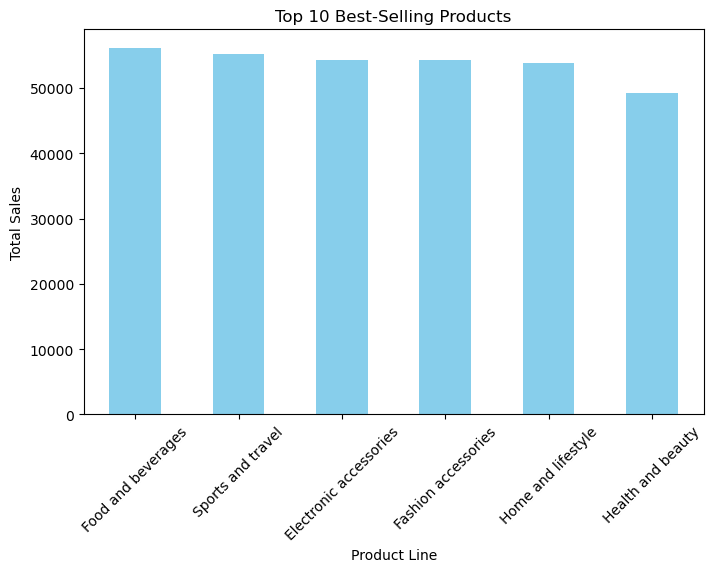

In [71]:
top_products = data.groupby('Product line')['Total'].sum().sort_values(ascending=False).head(10)
std_dev = data.groupby('Product line')['Total'].std().sort_values(ascending=False).head(10)

# Plot top 10 best-selling products
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.xticks(rotation=45)

# Print standard deviation for top products
print("Standard Deviation of Sales for Top 10 Products:")
print(std_dev)
plt.show()


Monthly Sales Trend with Statistical Analysis

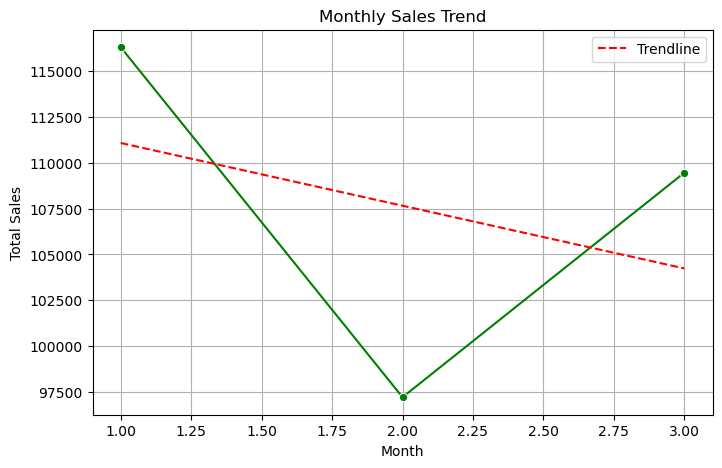

In [73]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Total'].sum()

# Plot monthly sales with trendline
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_sales, marker='o', color='green')

# Adding a trendline (linear regression)
from sklearn.linear_model import LinearRegression
X = np.array(range(1, len(monthly_sales) + 1)).reshape(-1, 1)
y = monthly_sales.values
model = LinearRegression().fit(X, y)
trendline = model.predict(X)
plt.plot(monthly_sales.index, trendline, linestyle='--', color='red', label='Trendline')

plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend()
plt.grid(True)
plt.show()


Revenue by Payment Method with Statistical Analysis

Average Revenue and Standard Deviation by Payment Method:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64
Payment
Cash           242.660640
Credit card    257.106200
Ewallet        239.305694
Name: Total, dtype: float64


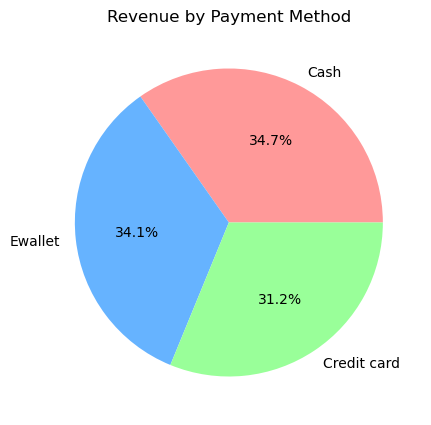

In [74]:
payment_sales = data.groupby('Payment')['Total'].sum().sort_values(ascending=False)
payment_std = data.groupby('Payment')['Total'].std()

# Plot revenue by payment method
plt.figure(figsize=(8, 5))
payment_sales.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Revenue by Payment Method')
plt.ylabel('')

# Print average and standard deviation for each payment method
print("Average Revenue and Standard Deviation by Payment Method:")
print(payment_sales)
print(payment_std)
plt.show()


Customer Rating Distribution with Statistical Insights

Rating Distribution - Mean: 6.97, Median: 7.00, Std Dev: 1.72


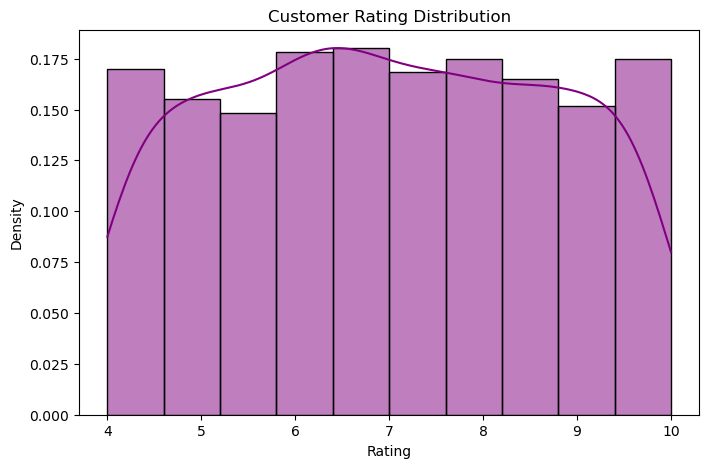

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=10, kde=True, color='purple', stat='density')

mean_rating = data['Rating'].mean()
median_rating = data['Rating'].median()
std_rating = data['Rating'].std()

print(f"Rating Distribution - Mean: {mean_rating:.2f}, Median: {median_rating:.2f}, Std Dev: {std_rating:.2f}")

plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


 Sales Performance by Customer Type with Statistical Analysis

Standard Deviation of Sales for Customer Types:
Customer type
Member    247.993782
Normal    243.902800
Name: Total, dtype: float64


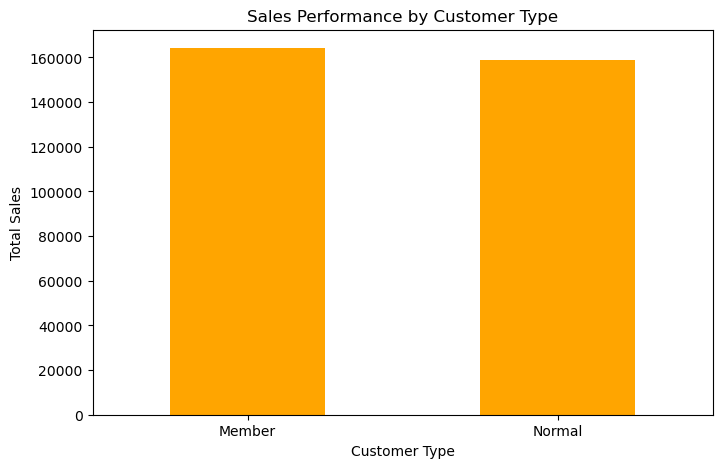

In [76]:
customer_sales = data.groupby('Customer type')['Total'].sum()
customer_std = data.groupby('Customer type')['Total'].std()

# Plot sales performance by customer type
plt.figure(figsize=(8, 5))
customer_sales.plot(kind='bar', color='orange')
plt.title('Sales Performance by Customer Type')
plt.ylabel('Total Sales')
plt.xlabel('Customer Type')
plt.xticks(rotation=0)

# Print standard deviation for customer types
print("Standard Deviation of Sales for Customer Types:")
print(customer_std)

plt.show()


Sales Distribution by City with Statistical Analysis

Coefficient of Variation for Each City:
City
Mandalay     0.757951
Naypyitaw    0.780662
Yangon       0.741594
Name: Total, dtype: float64


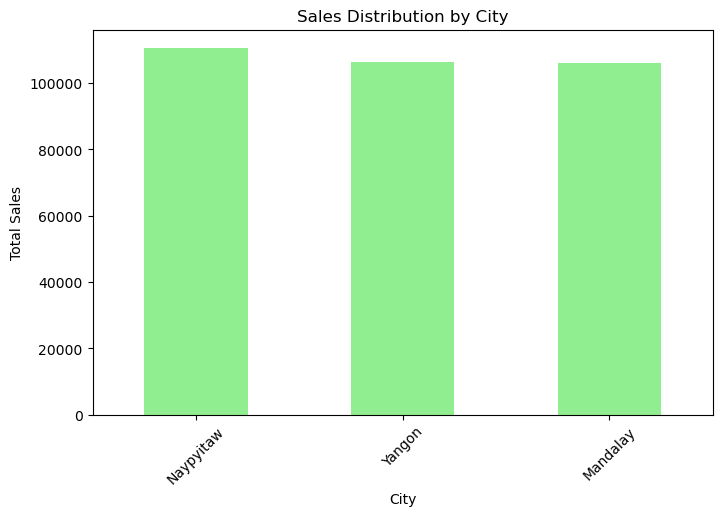

In [78]:
city_sales = data.groupby('City')['Total'].sum().sort_values(ascending=False)
city_std = data.groupby('City')['Total'].std()
city_mean = data.groupby('City')['Total'].mean()

# Calculate Coefficient of Variation
cv_city = city_std / city_mean

# Plot sales distribution by city
plt.figure(figsize=(8, 5))
city_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales Distribution by City')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.xticks(rotation=45)

# Print coefficient of variation for cities
print("Coefficient of Variation for Each City:")
print(cv_city)

plt.show()


Sales Comparison between Gender with Statistical Analysis

Mean and Standard Deviation for Gender-Based Sales:
Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64
Gender
Female    249.324401
Male      242.021730
Name: Total, dtype: float64


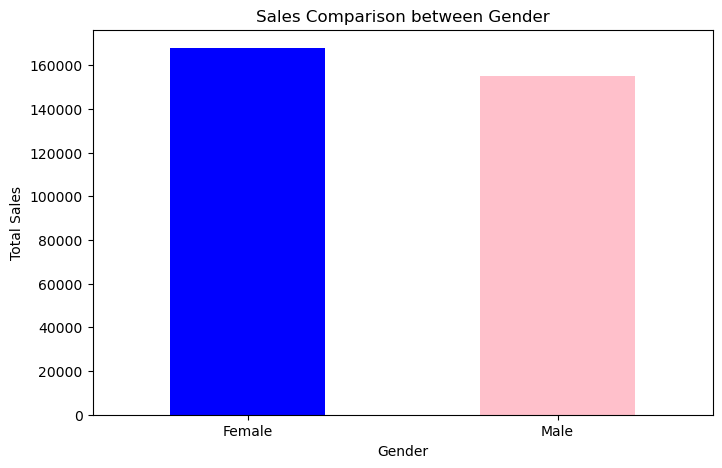

In [80]:
gender_sales = data.groupby('Gender')['Total'].sum()
gender_std = data.groupby('Gender')['Total'].std()

# Plot sales comparison between gender
plt.figure(figsize=(8, 5))
gender_sales.plot(kind='bar', color=['blue', 'pink'])
plt.title('Sales Comparison between Gender')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.xticks(rotation=0)

# Print mean and standard deviation for gender-based sales
print("Mean and Standard Deviation for Gender-Based Sales:")
print(gender_sales)
print(gender_std)

plt.show()
